<a href="https://colab.research.google.com/github/canimzali/Data_Science_Project/blob/main/CCOLA_NYSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.10.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (45.5 MB)
  Using cached pysimdjson-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.w

In [ ]:
from prophet import Prophet
import yfinance as yf

In [ ]:
#WE NEED TO PREDICT FUTURE OF COCA-COLA STOK PRICE#

df=yf.download('KO',"2005-01-01","2024-07-17")


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,20.950001,20.985001,20.705000,20.770,11.505925,14072000
2005-01-04,20.770000,20.825001,20.450001,20.480,11.345270,16860200
2005-01-05,20.500000,20.600000,20.370001,20.385,11.292650,13271000
2005-01-06,20.344999,20.575001,20.275000,20.555,11.386819,10038600
2005-01-07,20.535000,20.730000,20.424999,20.580,11.400671,9732800


In [ ]:
df=df[['Close']]

In [ ]:
df


,Close
Date,
2005-01-03,20.770000
2005-01-04,20.480000
2005-01-05,20.385000
2005-01-06,20.555000
2005-01-07,20.580000
...,...
2024-07-10,62.830002
2024-07-11,63.099998
2024-07-12,63.700001


In [ ]:
df=df.reset_index()

In [ ]:
df.columns=['ds','y']

In [ ]:
df.head(3)

,ds,y
0,2005-01-03,20.770
1,2005-01-04,20.480
2,2005-01-05,20.385


In [ ]:
model=Prophet()

In [ ]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0bq54f51/hpvh__1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0bq54f51/0gtay55y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59551', 'data', 'file=/tmp/tmp0bq54f51/hpvh__1n.json', 'init=/tmp/tmp0bq54f51/0gtay55y.json', 'output', 'file=/tmp/tmp0bq54f51/prophet_modelka0h_01x/prophet_model-20240718133643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:36:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:36:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
gelecek=model.make_future_dataframe(periods=365)

In [ ]:
tahmin=model.predict(gelecek)

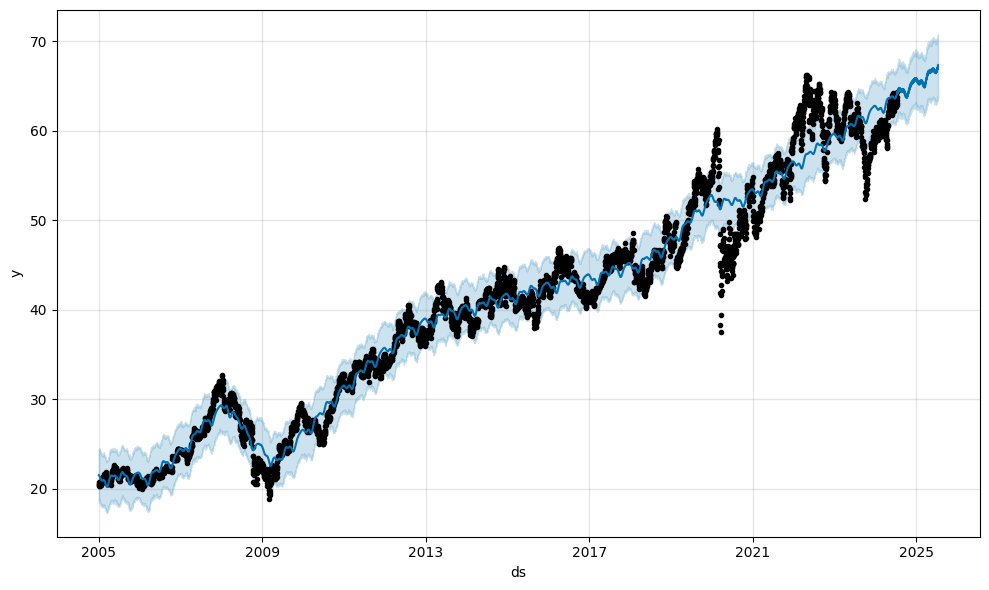

In [ ]:
model.plot(tahmin);

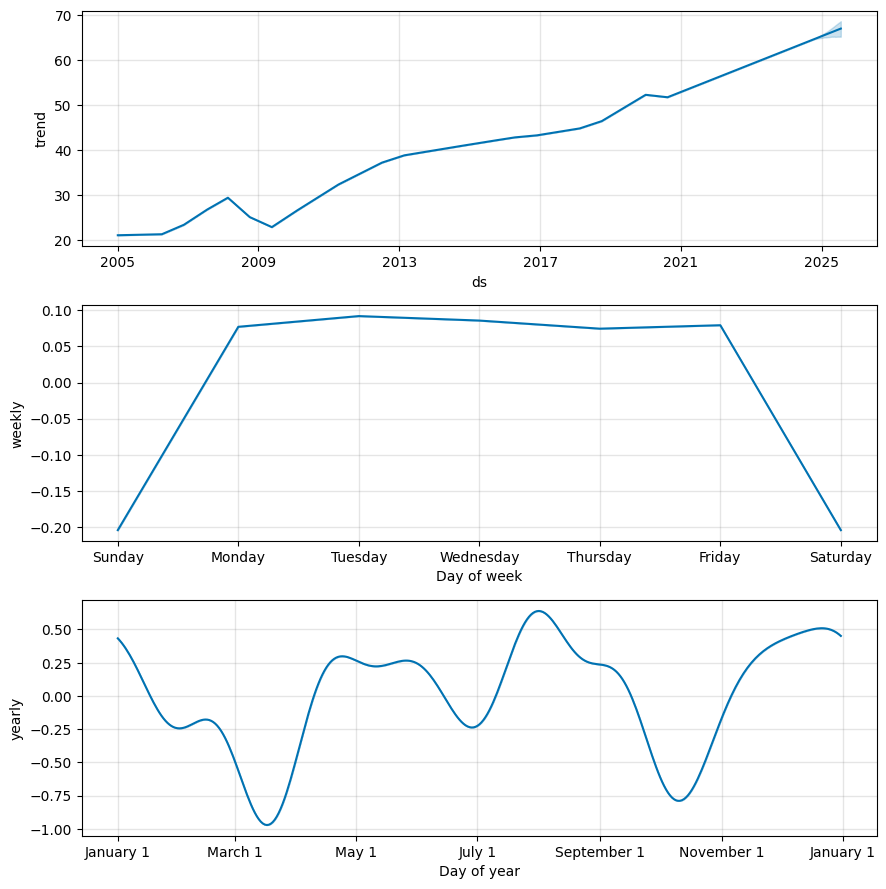

In [62]:
model.plot_components(tahmin);